<h1 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Exploratory Data Analysis - Ford Gobike  </h1>Ford Gobike 

<img src="https://pbs.twimg.com/profile_images/1285189888783060993/p4Rhm7d8_400x400.png">


**By:** Shefali Luley

> **Introduction**

This notebook is with respect to my final submission for the EDA project. I have used 'ford-go-bike-dataset' in this notebook. I will be choosing a coherent color palette throughout this notebook to keep it appealing to the eyes.

* **Ford GoBike** is the Bay Area’s bike share system. Bay Area Bike Share was introduced in 2013. 
* It services San Francisco, the East Bay and San Jose.
* Similar to other bike share systems, Ford GoBike consists of a fleet of bikes that can be unlocked in one station and returned in any other network station. 
* Thus, this is ideal for one-way trips. 
* These bikes are available for use thorughout the year and riders have access to all bikes in the network.

In [3]:
import warnings 
warnings.filterwarnings('ignore')


# import basic packages

import os
import numpy as np
import pandas as pd
import missingno as msno

#import visualization packages

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import datetime as dt

<h1 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Data Prepration and Loading</h1>


In [4]:
# load the 201902-fordgobike-tripdata.csv into a DataFrame
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [5]:
# to analyse the first 5 rows 
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>

* There are a total of **16 columns** in our dataset.
* We have been given the start and the end time of the journey, station id and station name as well as the latitude and longitude of starting as well as the ending points.

In [6]:
# to analyze the number of null value present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>

* An interesting thing to note here is that, even though the **start** and **end time** should be of **datetime** type, it is currently presented to us as object datatype. We would have to convert it.
* We can see that there are a few columns having null values in the dataset.
* **member_birth_year** and **member_gender** have a lot of null values. We may choose to drop them later.
* We have two types of user type, which is subscriber or customer.

In [7]:
#The transpose() function is used to transpose index and columns
#the DataFrame over its main diagonal by writing rows as columns and vice-versa
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_sec,183412.0,726.078435,1794.389780,61.000000,325.000000,514.000000,796.000000,85444.000000
start_station_id,183215.0,138.590427,111.778864,3.000000,47.000000,104.000000,239.000000,398.000000
start_station_latitude,183412.0,37.771223,0.099581,37.317298,37.770083,37.780760,37.797280,37.880222
start_station_longitude,183412.0,-122.352664,0.117097,-122.453704,-122.412408,-122.398285,-122.286533,-121.874119
end_station_id,183215.0,136.249123,111.515131,3.000000,44.000000,100.000000,235.000000,398.000000
end_station_latitude,183412.0,37.771427,0.099490,37.317298,37.770407,37.781010,37.797320,37.880222
end_station_longitude,183412.0,-122.352250,0.116673,-122.453704,-122.411726,-122.398279,-122.288045,-121.874119
bike_id,183412.0,4472.906375,1664.383394,11.000000,3777.000000,4958.000000,5502.000000,6645.000000
member_birth_year,175147.0,1984.806437,10.116689,1878.000000,1980.000000,1987.000000,1992.000000,2001.000000


<AxesSubplot:>

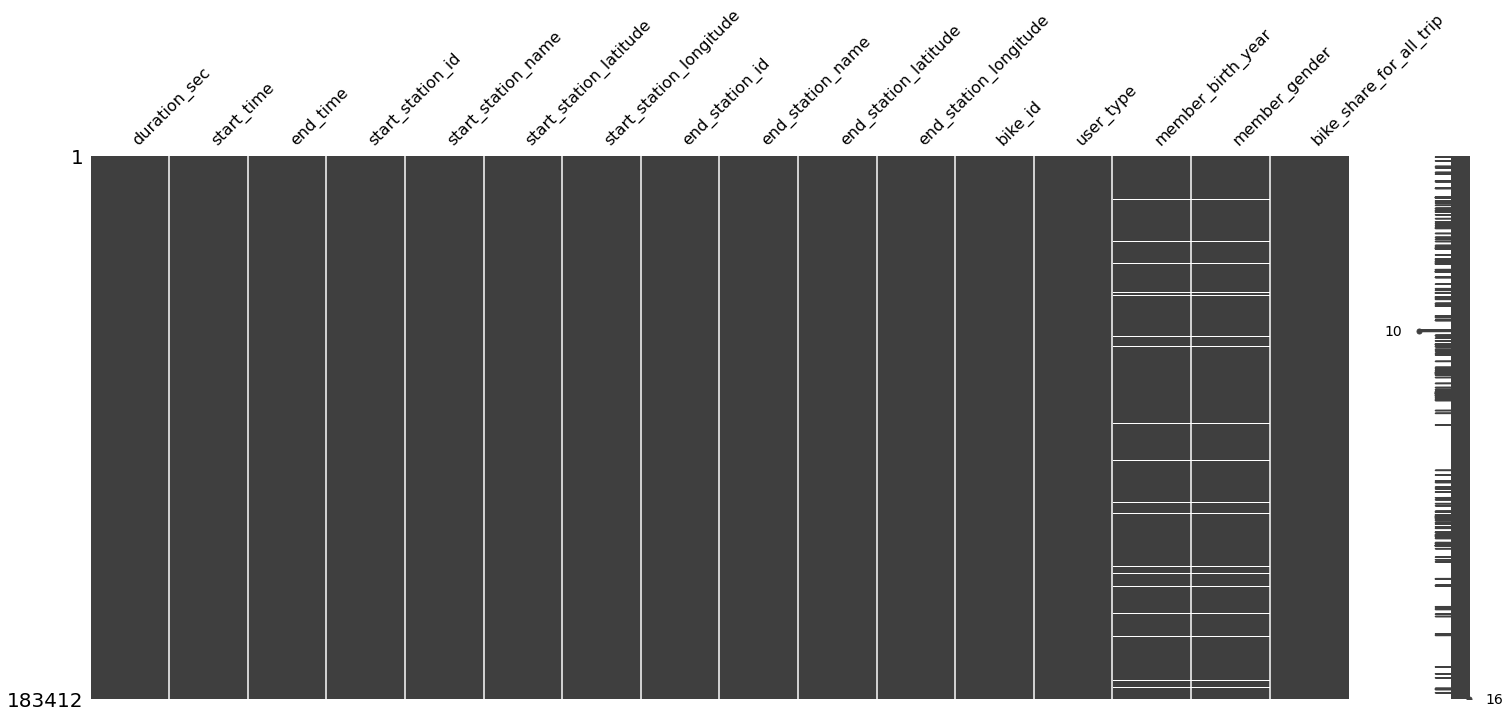

In [8]:
#Visualizing Missing values
msno.matrix(df)

<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>

* An interesting thing to note here is that, since the dataset contains too rows, we are unable to visualise those columns which have very few null values.
* However, we have seen above that there are a few columns having null values.
* We can see that **member_gender** and **member_birth_year** has same rows for missing values. We have confirmed the same in the two coding cells below.

In [9]:
print()
(df['member_birth_year'].isnull().sum()/df['member_birth_year'].count()) *100

4.718893272508236

In [10]:
print()
(df['member_gender'].isnull().sum()/df['member_gender'].count()) *100

4.718893272508236

Text(0.5, 1.0, 'Missing Values Heatmap')

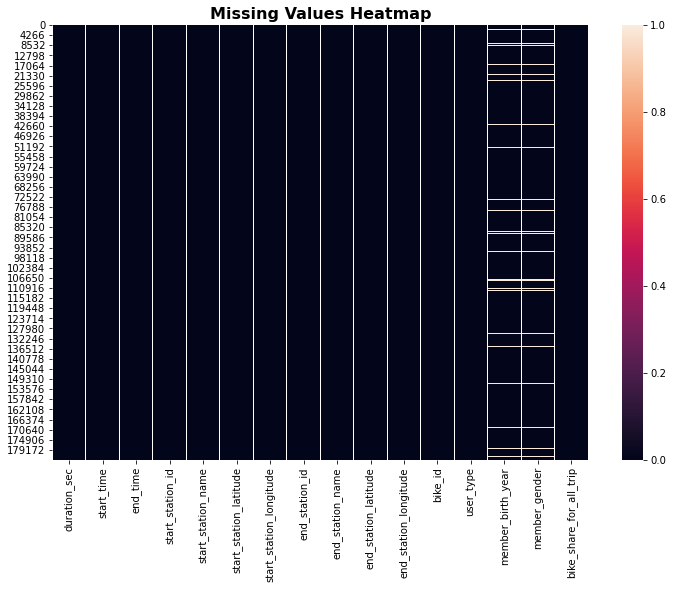

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull())
plt.title("Missing Values Heatmap", fontweight = 'bold', fontsize = 16)

In [12]:
df = df.dropna()

<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>

* Since we're not sure of how to deal with missing values individually, and there are less than **5%** of missing rows, we have decided to drop them directly instead of performing any **imputations**.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

## Univariate Exploration

> In this section, we investigate distributions of individual variables. 
If we see unusual points or outliers,  we take a deeper look to clean things up
and prepare  it to look at relationships between variables.

**How is the distribution of gender in the dataset?**

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64


Text(0.5, 1.0, 'Different gender distribution in the dataset')

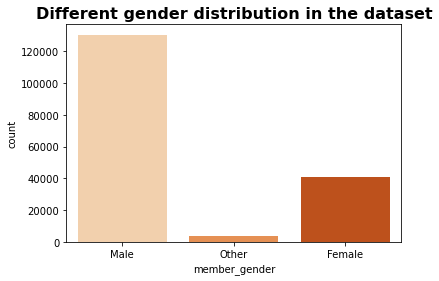

In [14]:
print(df['member_gender'].value_counts())
sns.countplot(df['member_gender'], palette = 'Oranges')
plt.title("Different gender distribution in the dataset", fontweight = 'bold', fontsize = 16)

<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>

* The number of **males** is the highest.
* Number of **females** renting a bike is less than 50% than the number of **males**.
* The count of **other** is almost negligible compared to the other two. 

**Check whether the bike is shared for all the trips or not?**

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64


Text(0.5, 1.0, 'Whether bike is shared for all trips or not (YES/ NO)')

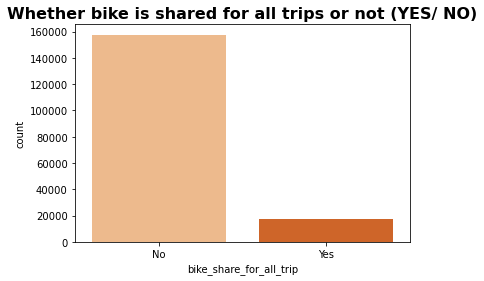

In [15]:
print(df['bike_share_for_all_trip'].value_counts())
sns.countplot(df['bike_share_for_all_trip'], palette = 'Oranges')
plt.title("Whether bike is shared for all trips or not (YES/ NO)", fontweight = 'bold', fontsize = 16)

<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>
    
**The bike is hardly shared for all the trips**

In [16]:
df['member_birth_year'] = df['member_birth_year'].apply(np.int64)
#df['age'] = 2021 - df['member_birth_year']

<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>

* We have converted the **member_birth_year** into integer to perform the mathematical operations and calculate the age of different **user_types**.

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables in the
data. 

**Identifying the data age ranges with respect to gender?**

In [17]:
df['age'] = 2021 - df['member_birth_year']

Text(0.5, 1.0, 'Age groups with respect to different genders ')

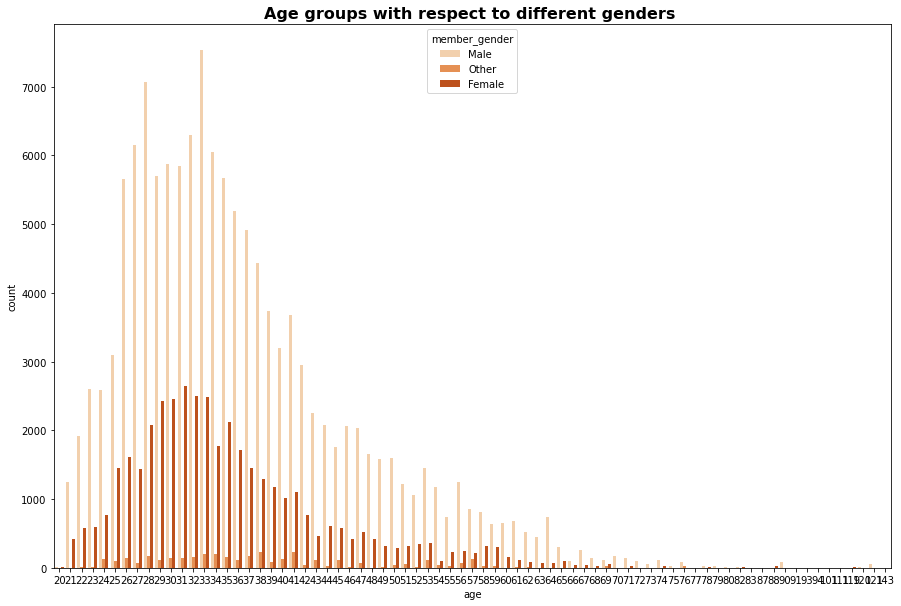

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(df['age'], hue = df['member_gender'], palette = 'Oranges')
df['age'].value_counts()
plt.title("Age groups with respect to different genders ", fontweight = 'bold', fontsize = 16)

<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>

* From the graph above, we can see that there are ages ranging from **20** to **143 years old**.
* We will be making an assumption that people above the age of 100 years are **outliers**.
* Thus, we would be removing the rows directly where the age is above **100**
. 

In [21]:
def age_group(x):
    """Return x of the age_group."""
    if (x>=20 and x<30):
        return "20-30"
    if (x>=30 and x<40):
        return "30-40"
    if (x>=40 and x<50):
        return "40-50"
    elif (x>=50 and x<60):
        return "50-60"
    else:
        return "Above 60"

<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>

* Since we could not derive any insightful information from the graph above, we have decided to group the ages into categories of 10 values each.
* We will not visualize the data again.

In [22]:
df['age_slab'] = df['age'].apply(lambda x: age_group(x))

In [23]:
df['age_slab'].value_counts()

30-40       76788
20-30       48176
40-50       30207
50-60       14000
Above 60     5781
Name: age_slab, dtype: int64

<AxesSubplot:xlabel='age_slab', ylabel='count'>

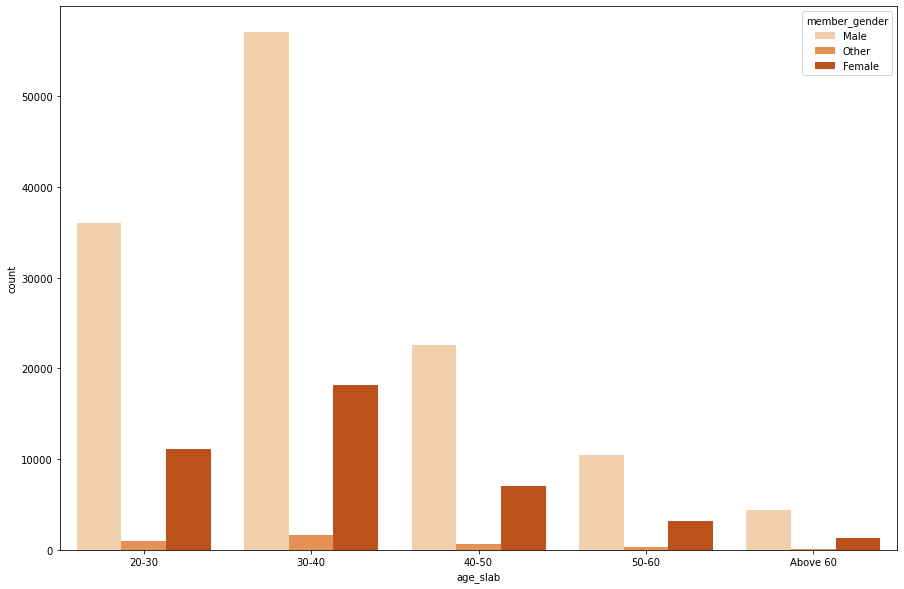

In [24]:
plt.figure(figsize=(15,10))
k=['20-30','30-40','40-50','50-60','Above 60']
df['age_slab']= sorted(df['age_slab'], key=k.index)
sns.countplot(df['age_slab'], hue = df['member_gender'], palette = 'Oranges')

In [25]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df = df.sort_values(by='start_time')

In [26]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,age_slab
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989,Male,No,32,Above 60
183406,706,2019-02-01 00:04:40.616,2019-02-01 00:16:27.080,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988,Male,No,33,Above 60
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,No,25,Above 60
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,No,33,Above 60
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,No,37,Above 60


<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>

* We can see that a new column of **age_slab** has been added to the dataset.

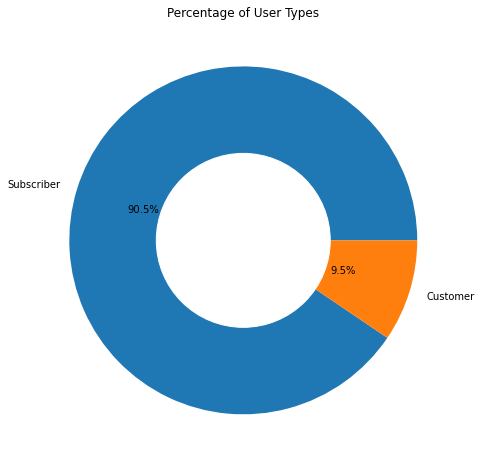

In [27]:
plt.figure(figsize=[16,8])
plt.pie(df['user_type'].value_counts(),labels = df['user_type'].value_counts().index,autopct='%1.1f%%')
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percentage of User Types')
plt.show()

Text(0.5, 1.0, 'Age Distribution ')

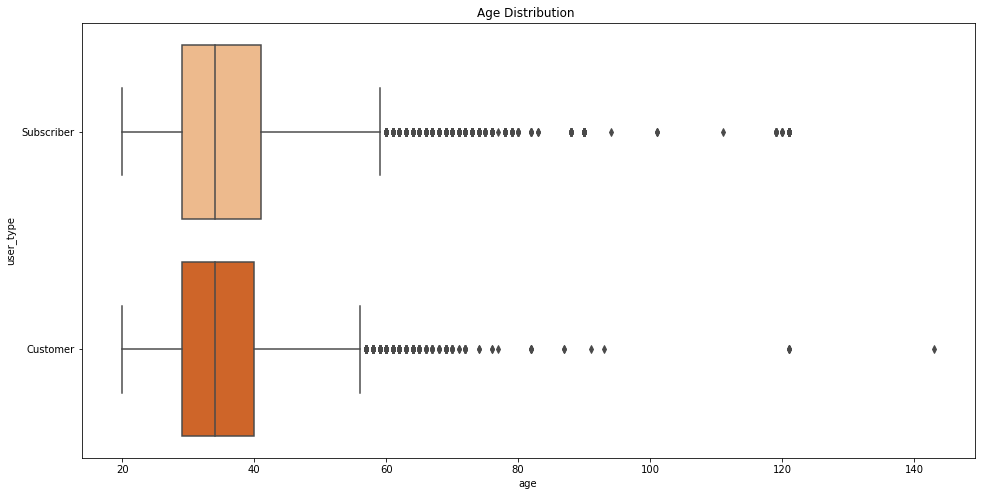

In [28]:
plt.figure(figsize=[16,8])
sns.boxplot(x='age',y='user_type',data=df,palette='Oranges')
plt.title('Age Distribution ')

**Removing the outliers**

In [29]:
df = df[df['age']<100]

Text(0.5, 1.0, 'Age Distribution ')

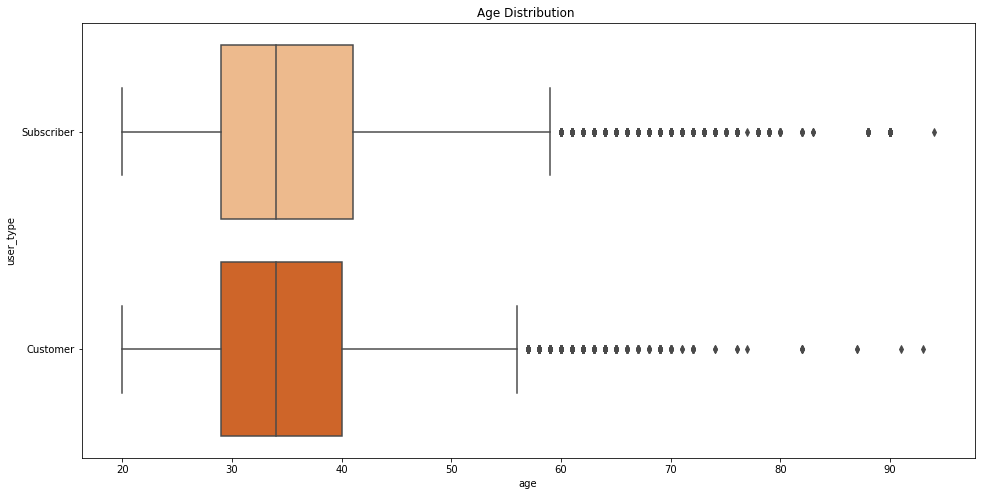

In [30]:
plt.figure(figsize=[16,8])
sns.boxplot(x='age',y='user_type',data=df,palette='Oranges')
plt.title('Age Distribution ')

In [31]:
pd.to_datetime(df['start_time'])

183411   2019-02-01 00:00:20.636
183406   2019-02-01 00:04:40.616
183407   2019-02-01 00:04:49.724
183410   2019-02-01 00:05:34.360
183408   2019-02-01 00:05:34.744
                   ...          
6        2019-02-28 23:55:35.104
14       2019-02-28 23:56:26.848
11       2019-02-28 23:56:55.540
10       2019-02-28 23:57:57.211
15       2019-02-28 23:59:18.548
Name: start_time, Length: 174877, dtype: datetime64[ns]

In [32]:
df['day']=df['start_time'].dt.weekday

<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>

* Let us try to understand if there's a particular day where the bikes are rented the most.
* My guess here would be that the number might be high either on **weekends** for short trips or hikes or for the **weekdays** for daily commute during **office**.
* Let us check it out!

In [33]:
df['day'].value_counts()

3    33705
1    30567
2    28415
4    27645
0    25630
6    14504
5    14411
Name: day, dtype: int64

In [34]:
weekDays = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
df['day'] = df['day'].map(weekDays)

In [35]:
df['day'].value_counts()

Thursday     33705
Tuesday      30567
Wednesday    28415
Friday       27645
Monday       25630
Sunday       14504
Saturday     14411
Name: day, dtype: int64

<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>

* We have converted the weekdays of the data into the words which would help us in better presentation and visualization of the data. 

**Which user type rents the bike most and on which days?**

Text(0.5, 1.0, 'Bike hiring on different days of the week')

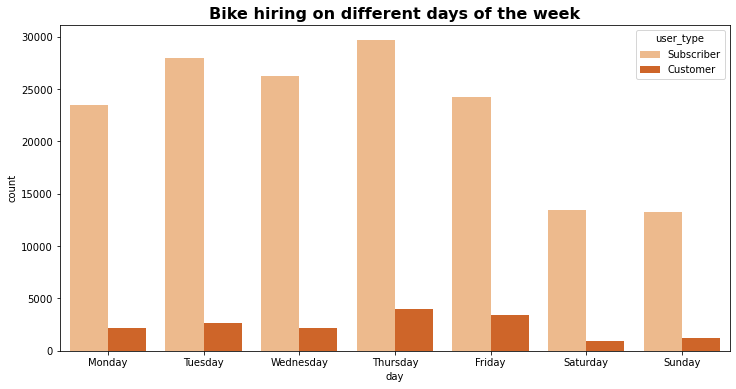

In [36]:
plt.figure(figsize=(12,6))
k=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['day']= sorted(df['day'], key=k.index)
sns.countplot(df['day'], hue = df['user_type'], palette = 'Oranges')
plt.title("Bike hiring on different days of the week", fontweight = 'bold', fontsize = 16)

<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>

* It is interesting to note that the number of people hiring on **weekdays** is significantly higher than the one's hiring on the **weekends**.
* This might probably be due to the daily commute to office.
* Another thing to notice is that the number of **subscribers** of the bikes are quite high as compared to the **customers**.

In [37]:
top10 = df['start_station_name'].value_counts().head(10)

In [38]:
top10

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3406
Berry St at 4th St                                           2951
Montgomery St BART Station (Market St at 2nd St)             2709
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2572
San Francisco Ferry Building (Harry Bridges Plaza)           2540
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

In [39]:
import squarify as sq

Text(0.5, 1.0, 'Top 10 Hiring Points')

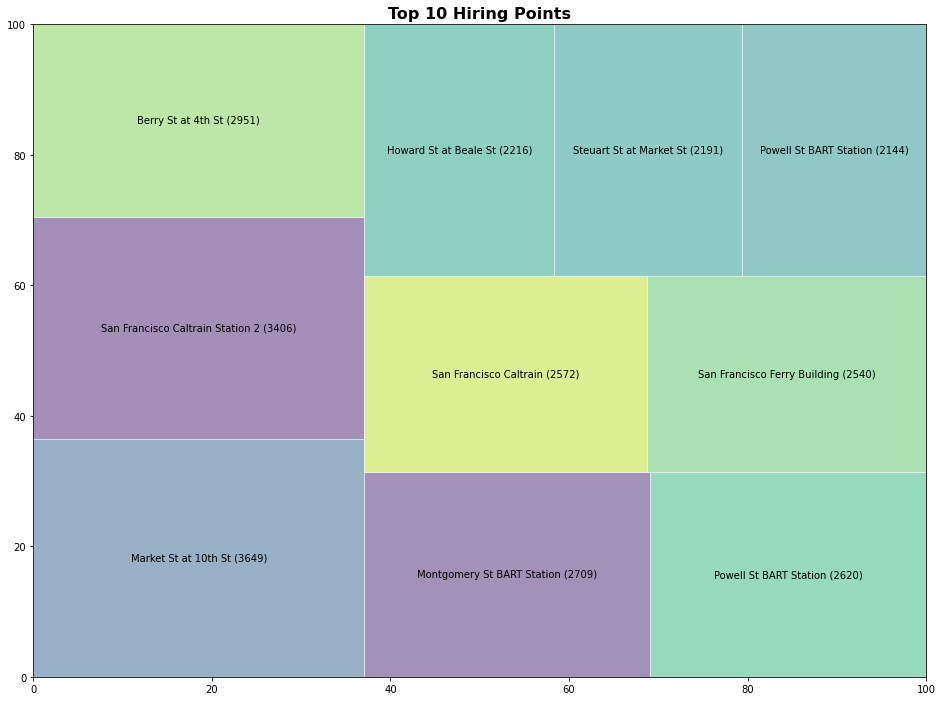

In [40]:
plt.figure(figsize=[16,12])
label= [ 'Market St at 10th St (3649)',
'San Francisco Caltrain Station 2 (3406)',    
'Berry St at 4th St (2951)',
'Montgomery St BART Station (2709)',       
'Powell St BART Station (2620)',           
'San Francisco Caltrain (2572)',         
'San Francisco Ferry Building (2540)',        
'Howard St at Beale St (2216)',                                        
'Steuart St at Market St (2191)',                                      
'Powell St BART Station (2144)']  
sq.plot(top10,label=label,edgecolor="white",alpha=0.5)
plt.title('Top 10 Hiring Points', fontsize = 16, fontweight = 'bold')


In [41]:
import math
def distance(origin, destination):
    """Return the origin,destination of the distance."""
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [42]:

df['distance_travelled_km'] = df.apply(lambda i: distance([i['start_station_longitude'],i['start_station_latitude']],
                            [i['end_station_longitude'],i['end_station_latitude']]), axis=1)

In [43]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,age_slab,day,distance_travelled_km
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989,Male,No,32,Above 60,Monday,0.672764
183406,706,2019-02-01 00:04:40.616,2019-02-01 00:16:27.080,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988,Male,No,33,Above 60,Monday,2.218772
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,No,25,Above 60,Monday,1.853220
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,No,33,Above 60,Monday,0.460297
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,No,37,Above 60,Monday,1.107112


**What is the distance travelled with respect to gender?**

Text(0.5, 1.0, 'Age Distribution')

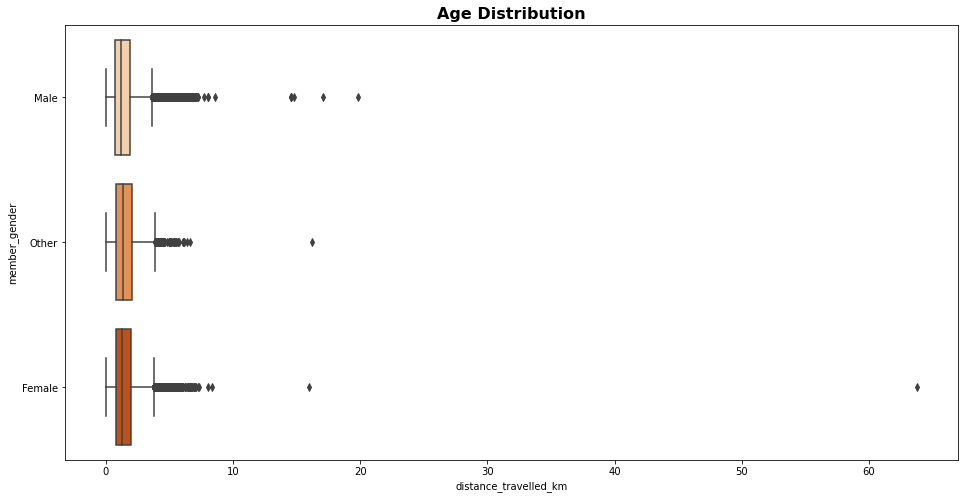

In [44]:
plt.figure(figsize=[16,8])
sns.boxplot(x='distance_travelled_km',y='member_gender',data=df,palette='Oranges')
plt.title('Age Distribution', fontweight = 'bold', fontsize = 16)

In [45]:
df = df[df['distance_travelled_km'] <12.5]

Text(0.5, 1.0, 'Age Distribution ')

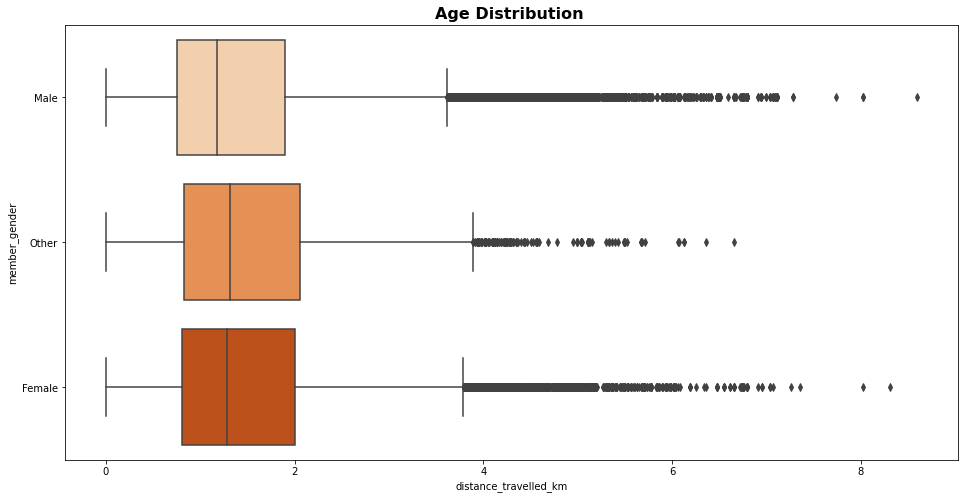

In [46]:
plt.figure(figsize=[16,8])
sns.boxplot(x='distance_travelled_km',y='member_gender',data=df,palette='Oranges')
plt.title('Age Distribution ', fontweight = 'bold', fontsize = 16)

Text(0.5, 1.0, 'Distance travelled by different age-group')

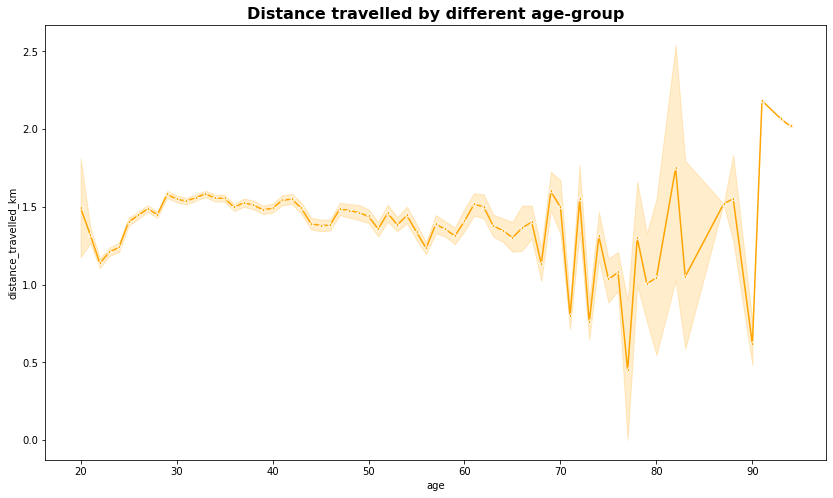

In [47]:
plt.figure(figsize=[14,8])
sns.lineplot(x='age',y='distance_travelled_km',data=df,marker='*',color= 'orange')
plt.title("Distance travelled by different age-group", fontweight = 'bold', fontsize = 16)

# Multivariate Exploration

Text(0.5, 1.0, 'Distance travelled by different age groups and gender')

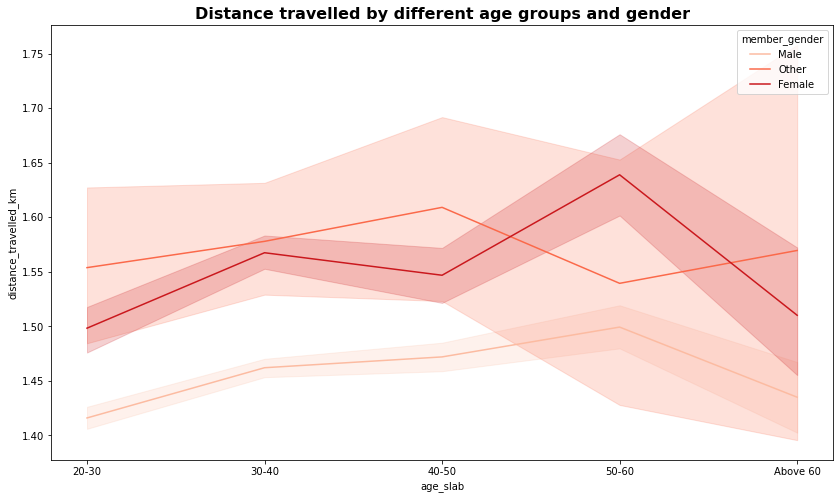

In [48]:
plt.figure(figsize=[14,8])
k=['20-30','30-40','40-50','50-60','Above 60']
df['age_slab']= sorted(df['age_slab'], key=k.index)
sns.lineplot(y='distance_travelled_km',x='age_slab',hue='member_gender',data=df,palette = 'Reds')
plt.title("Distance travelled by different age groups and gender", fontweight = 'bold', fontsize = 16)

<h3 style = "font-family: Comic Sans MS;background-color:#ef9c48	"> Inferences: </h3>

* **Males** travel less distance on an average as compared to **females** and **others**.
* Average distance travelled by people of age group 30-40 is higher than that of 20-30 ffor all the three cases.

**References**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

https://stackoverflow.com/questions/13021654/get-column-index-from-column-name-in-python-pandas

https://www.w3schools.com/python/python_datetime.asp

https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

https://stackoverflow.com/questions/50491747/extracting-the-meaningful-information-from-the-text-column-using-python

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html
    

## 